In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_data(file_path):
    return pd.read_csv(file_path, sep=';', names=['comment', 'emotion'])


In [3]:
def preprocess(text):
    tokens = []
    for token in nlp(text):
        if not token.is_space and not token.is_punct:
            tokens.append(token.lemma_)
    return ' '.join(tokens)

In [4]:
emotion_map = {
    'joy': 0,
    'sadness': 1,
    'anger': 2,
    'fear': 3,
    'love': 4,
    'surprise': 5
}

In [5]:
df_train = load_data('train.txt')
df_test = load_data('test.txt')
df_val = load_data('val.txt')

In [6]:
df_train['map'] = df_train.emotion.map(emotion_map)
df_test['map'] = df_test.emotion.map(emotion_map)
df_val['map'] = df_val.emotion.map(emotion_map)


In [7]:
nlp = spacy.load("en_core_web_sm")

In [8]:
df_train['preprocessed_comment'] = df_train.comment.apply(preprocess)
df_test['preprocessed_comment'] = df_test.comment.apply(preprocess)
df_val['preprocessed_comment'] = df_val.comment.apply(preprocess)


In [9]:
X_train = df_train['preprocessed_comment']
y_train = df_train['map']
X_test = df_test['preprocessed_comment']
y_test = df_test['map']
X_val = df_val['preprocessed_comment']
y_val = df_val['map']


In [10]:
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=200, criterion='gini'))
])


In [11]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=200))])

In [12]:
y_pred_test = pipe.predict(X_test)
y_pred_val = pipe.predict(X_val)


In [13]:
print('Classification Report TEST DATA:\n\n', classification_report(y_test, y_pred_test, target_names=list(emotion_map.keys())))


Classification Report TEST DATA:

               precision    recall  f1-score   support

         joy       0.79      0.94      0.86       695
     sadness       0.91      0.87      0.89       581
       anger       0.90      0.77      0.83       275
        fear       0.83      0.79      0.81       224
        love       0.83      0.54      0.66       159
    surprise       0.59      0.50      0.54        66

    accuracy                           0.84      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.84      0.84      0.83      2000



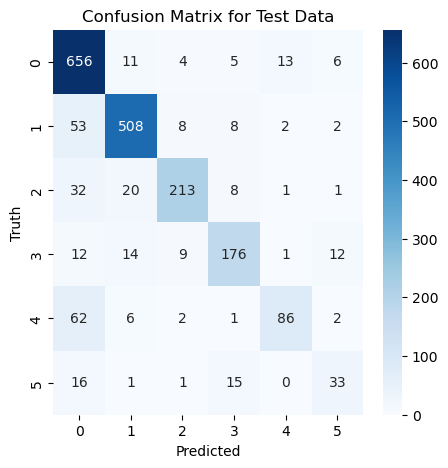

In [14]:
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt="d", cmap='Blues')
plt.ylabel("Truth")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Test Data")
plt.show()

In [15]:
print('Classification Report VAL DATA:\n\n', classification_report(y_val, y_pred_val, target_names=list(emotion_map.keys())))


Classification Report VAL DATA:

               precision    recall  f1-score   support

         joy       0.80      0.94      0.87       704
     sadness       0.88      0.88      0.88       550
       anger       0.89      0.78      0.83       275
        fear       0.84      0.77      0.81       212
        love       0.89      0.60      0.71       178
    surprise       0.81      0.64      0.72        81

    accuracy                           0.84      2000
   macro avg       0.85      0.77      0.80      2000
weighted avg       0.85      0.84      0.84      2000



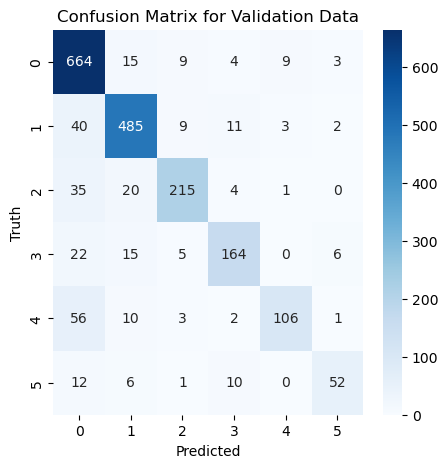

In [16]:
cm_val = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_val, annot=True, fmt="d", cmap='Blues')
plt.ylabel("Truth")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Validation Data")
plt.show()